<a href="https://colab.research.google.com/github/revan-desai/machine_learning_for_data_science/blob/main/14_function_transformer_log_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import pandas as pd
import pylab

df=sns.load_dataset('titanic')

df.head(3)



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [4]:
df=df[['age','fare','survived']]

df.head(3)

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1


In [5]:
df.isnull().sum()

age         177
fare          0
survived      0
dtype: int64

In [6]:
df.fillna(df['age'].mean(),inplace=True)

In [7]:
X=df.drop(columns=['survived'])    #means all columns in X except survived column
y=df['survived']

In [8]:
X

,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=15)

## checking normal distribution of numerical columns

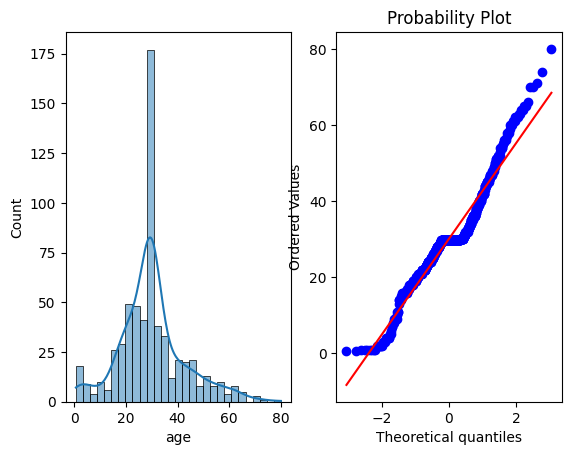

0.4344880940129925

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
sns.histplot(X_train['age'],kde=True)   #1st way to check normal distribution

plt.subplot(1,2,2)
stats.probplot(X_train['age'],dist='norm',plot=pylab)  #2nd way to check normal distribution

plt.show()
df['age'].skew()   #3rd way to check normal distribution ....value if 0 or near 0 then normal distribution

## Using algorithm without applying log transform

### normally we apply Standard Scaling on X_train and X_test to improve it.  but we are not doing here

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

print(accuracy_score(y_test,y_pred))


0.6455223880597015


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred1=dt.predict(X_test)

print(accuracy_score(y_test,y_pred1))

0.6044776119402985


##2. Using algorithm with applying log transform

In [38]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np
trf=FunctionTransformer(np.log1p)

X_train=trf.fit_transform(X_train)

X_test=trf.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

print(accuracy_score(y_test,y_pred))  # check accuracy scored is increased now

0.6865671641791045


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6268656716417911


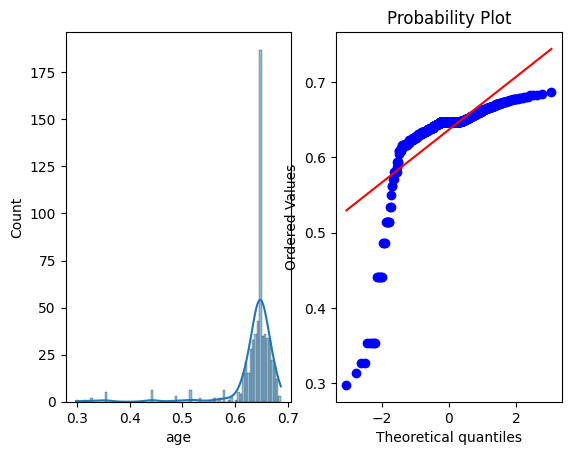

In [39]:
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
sns.histplot(X_train['age'],kde=True)


plt.subplot(1,2,2)
stats.probplot(X_train['age'],dist='norm',plot=pylab)   # you can observe result got worsened
plt.show()

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

def apply_transform(transform):
    X = df.drop(columns=['survived'])
    y = df['survived']

    trf = ColumnTransformer([
          ('log',FunctionTransformer(transform),['Fare'])
          ],remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))



    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()